# Introduction to Appendix Code Document

Hello, this is the code I have used to produce the graphs and raw text for captions and explanations, which most content have been transferred to MATE60002 Atomistic Simulations Submissions 02262227. Images of structures and the restart file for Part I of the assignment have not been included in this document, and can be found in the same folder this Python code is on GitHub.

If you are having problems with this code, please let me know (mo322@ic.ac.uk). Thank you!

In [1]:
# Run these codes first so the following codes can be operated successfully! #
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1st Workshop - Energy Minimisation
Figure 1: Fully relaxed, double-hook structure of a 22-atom polymer at its minimum potential energy from 850K using Langevin Dynamics, using 750000 production steps.

- U(bond) = 0.000674296 / 22 = 0.00003064981818 eV/atom 
- U(LJ) = -0.534525763 / 22 = -0.02429662559 eV/atom 
- U = U(bond) + U(LJ) = 0.00003064981818 - 0.02429662559 = -0.0243272754090909 eV/atom 

The polymer exhibits a double hook configuration primarily because at full relaxation, forces (driven by potential energy changes) exhibited by atomic bonds are minimised and steric hindrance dominantly contributes towards the minimised potential energy, causing non-bonding (Leonard-Jones) interactions with the solvent present.

# 2nd Workshop - Molecular dynamics

Figure 2: (a) L2/N (nm) vs Temperature T (K) for a 22-atom polymer using Langevin NVT dynamics, with corresponding standard error bars. 10 simulations were performed at each temperature under 300,000 production steps. Representative polymer structures at (b) 150K, (c) 325K and (d) 850K have been included.

Observing the overall trend, increasing the temperature of the polymer will eventually lead to a plateau in L2/N, where the polymer goes from a rather coiled state to a more extended state as atoms experience higher kinetic energy (considering K = 3/2 (N-1) kBT) to allow extension, but is limited by thermally-driven entropy. A significantly large error is observed around 325K where the polymer has high variation in L2/N, reflecting a potential structural transition where potential energy (causing collapsed states) and kinetic energy (causing extended states) frequently fluctuate between between time steps, thus implying configurational instability.  

  TargetT    AverageT  AverageL2N  StdError
0    850K  890.216003   12.921493  1.203460
1    675K  708.183176   12.939672  1.369499
2    580K  607.498188   12.663286  1.296005
3    500K  523.841858   12.760385  1.705527
4    425K  445.345051   12.357305  1.292235
5    325K  340.739620    9.909791  2.591651
6    280K  293.631672    9.445962  2.754020
7    250K  261.370537    7.524087  2.285830
8    200K  209.386545    5.033285  1.419084
9    150K  157.235116    4.396990  1.128681


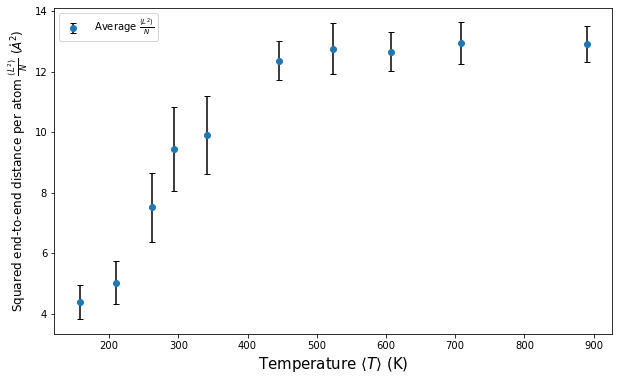

In [8]:
# Read the data from the text file into a DataFrame
file_path = 'Molecular dynamics averages data.txt'
df = pd.read_csv(file_path, delimiter=',')
print(df)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.errorbar(df['AverageT'], df['AverageL2N'], yerr=df['StdError']/2, fmt='o', ecolor='black', capsize=3, label= r' Average $\frac{\langle L^2 \rangle}{N} $')

plt.ylabel(r'Squared end-to-end distance per atom $\frac{\langle L^2 \rangle}{N} $ ($\mathring{A}^2$)', fontsize = 12)
plt.xlabel(r'Temperature $\langle T \rangle$ (K)', fontsize = 15)
plt.legend()
plt.show()




# 3rd Workshop - Monte Carlo

Figure 3: (a) Potential U (eV) vs Temperature (K), (b) L2/N (nm) vs Temperature (K) graphs for linear and coiled structures from equilibriation and production runs at 100K and 800K.

At 100K, there is a larger potential energy difference between the linear and coiled structures in comparison to 800K, which can be explained through the higher non-bonding interactions (such as Van de Waal forces or hydrogen bonding) present in the latter structure for higher stabilisation, subsequently reducing L^2/N as well. With MMC, randomly displacing a polymer atom for new configurations is a fairly valid approach if sufficiently high temperatures are used because, regardless of input temperature, higher energy states between steps are probable - using lower temperatures, where atoms have limited motion, would produce a higher percentage of rejected moves where high energy states are more likely to be unfavourable. 

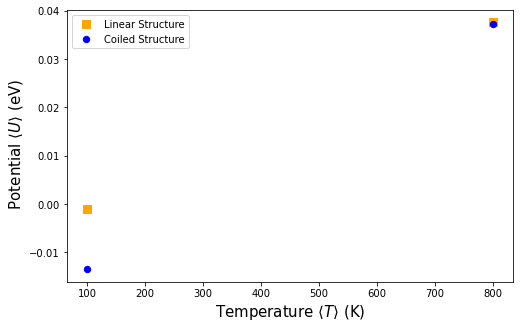

In [3]:
temps = [100,800]
Equilavg_PE = [-0.001088, 0.037553]
Prodavg_PE = [-0.013532, 0.03722]

# average U (eV) vs Temperature (K)
plt.figure(figsize=(8, 5))
plt.scatter(temps,Equilavg_PE,color ='orange', s = 80, marker = 's', label = 'Linear Structure')
plt.scatter(temps,Prodavg_PE, color = 'blue', s = 40, label = 'Coiled Structure')
plt.ylabel(r' Potential $\langle U \rangle$ (eV)', fontsize = 15)
plt.xlabel(r'Temperature $\langle T \rangle$ (K)', fontsize = 15)
plt.legend()
plt.grid(False)
plt.show()


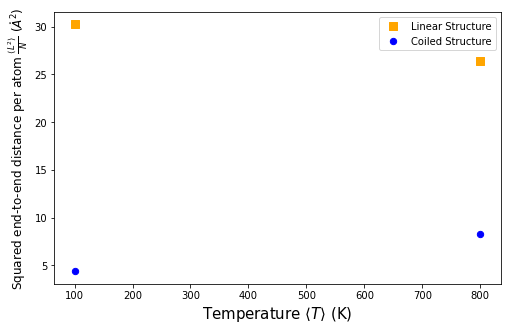

In [6]:
Equilavg_L2N = [30.241962, 26.421145]
Prodavg_L2N = [4.36446, 8.303498]

# average L2/N (eV) vs Temperature (K)
plt.figure(figsize=(8, 5))
plt.scatter(temps,Equilavg_L2N,color ='orange',s = 80, marker = 's', label = 'Linear Structure')
plt.scatter(temps,Prodavg_L2N, color = 'blue', s= 40 , label = 'Coiled Structure')
plt.ylabel(r'Squared end-to-end distance per atom $\frac{\langle L^2 \rangle}{N} $ ($\mathring{A}^2$)', fontsize = 12)
plt.xlabel(r'Temperature $\langle T \rangle$ (K)', fontsize = 15)
plt.grid(False)
plt.legend()
plt.show()